In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

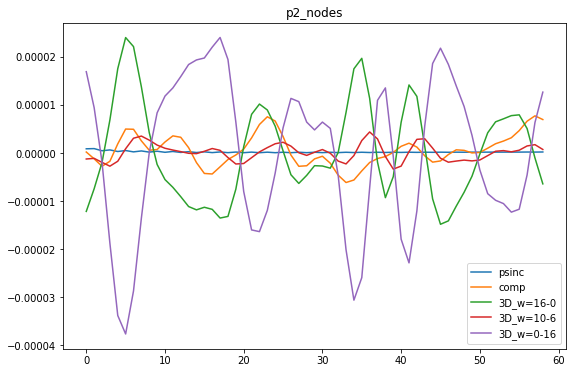

In [61]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 2
et = 1.0
N = 1

probe_loc=[0,0]

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=64)
tags = list(tc.get_tag_dict().values())

dtag = tc.get_debug_attrs()

psinc_sfx = '3D_psinc'
comp_bal_sfx = '3D_comp_bal'

sfxs = ['3D_w=16-0','3D_w=10-6','3D_w=0-16']

# attributes = ['rho', 'rhou', 'rhow', 'rhoY', 'buoy', 'p2_nodes']
attributes = ['p2_nodes']

times = np.arange(0.0,1.001,0.005)
times = times[140:]
slc = 5
slc = (slice(None,),slice(slc,slc+1),slice(None,))

lst = np.zeros((len(attrs), times.shape[0]), dtype='object')


diff = False
for nn,attribute in enumerate(attributes):
    if attribute == 'p2_nodes': diff = True

#     psinc = tc.get_arr(path_psinc, time, N, attribute, label_type='TIME', tag=tags3d[-1], inner=True)
    psinc = tc.get_time_series(times, N, attribute, psinc_sfx, probe_loc, diff=diff, slc=slc)
    comp = tc.get_time_series(times, N, attribute, comp_bal_sfx, probe_loc, diff=diff, slc=slc)


    plt.figure(figsize=(9,6))
    plt.plot(psinc[1:], label='psinc')
    plt.plot(comp[1:], label='comp')
    
    for sfx in sfxs:
        cb = tc.get_time_series(times, N, attribute, sfx, probe_loc, cont_blend=True, fs=1, ts=0, diff=diff, slc=slc)
        plt.plot(cb[1:], label=sfx)
        
    plt.title(attribute)
    plt.legend()
    plt.show()
        

# pl = pt.plotter(vlst,figsize=(20,4), ncols=5)
# pl = pt.plotter(aux, figsize=(20,4), ncols=5)
# pl.plot(fontsize=16,suptitle=attrs3d[aux_id], rect=[0, 0.03, 1, 0.95])

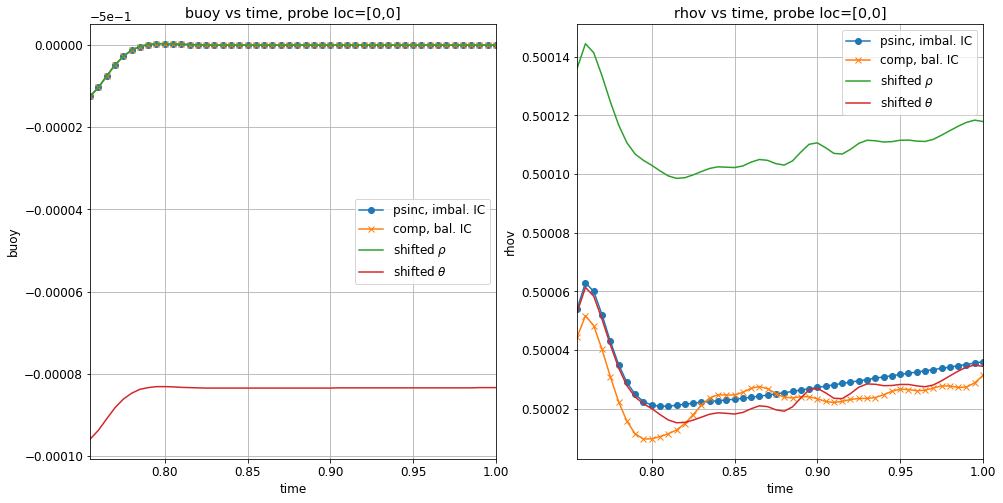

In [113]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
N = 1

probe_loc=[0,0]

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = list(tc.get_tag_dict().values())

# attributes = ['rho', 'rhou', 'rhov', 'buoy', 'rhoY', 'p2_nodes']
attributes = ['buoy', 'rhov']

times = np.arange(0.0,1.001,0.005)
times = times[1:]
times = times[150:]

comp_bal_sfx = 'comp_bal'
psinc_sfx = 'psinc_imbal'

sfx1 = 'shift_rho'
sfx2 = 'shift_theta'

diff = False

pl = pt.plotter_1d(ncols=2,nrows=1, figsize=(16,8),fontsize=12)
for nn,attribute in enumerate(attributes):
    if attribute == 'p2_nodes': diff = True

    psinc = tc.get_time_series(times, N, attribute, psinc_sfx, probe_loc, diff=diff)
    comp = tc.get_time_series(times, N, attribute, comp_bal_sfx, probe_loc, diff=diff)
    
    shift_rho = tc.get_time_series(times, N, attribute, sfx1, probe_loc, diff=diff, cont_blend=True, fs=1, ts=0)
    shift_theta = tc.get_time_series(times, N, attribute, sfx2, probe_loc, diff=diff, cont_blend=True, fs=1, ts=0)
    
    ax = pl.get_ax(nn)
    ax.plot(times,psinc, '-o', label='psinc, imbal. IC')
    ax.plot(times,comp, '-x', label='comp, bal. IC')
    ax.plot(times,shift_rho, label=r'shifted $\rho$')
    ax.plot(times,shift_theta, label=r'shifted $\theta$')
    ax.legend()
    ax.set_xlim(times[0],times[-1])
    ax.set_title('%s vs time, probe loc=[%i,%i]' %(attribute,probe_loc[0],probe_loc[1]))
    ax.set_xlabel('time')
    ax.set_ylabel(attribute)
    ax.grid()
    